In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [ ]:
def load_dataset(dataset_name='iris'):
    if dataset_name.lower() == 'iris':
        data = load_iris()
        print("Loaded Iris dataset")
    elif dataset_name.lower() == 'wine':
        data = load_wine()
        print("Loaded Wine dataset")
    else:
        raise ValueError("Dataset must be 'iris' or 'wine'")

    X = data.data
    y = data.target
    feature_names = data.feature_names
    target_names = data.target_names

    print(f"Dataset shape: {X.shape}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Number of classes: {len(target_names)}")
    print(f"Feature names: {feature_names}")
    print(f"Target names: {target_names}")
    print("-" * 50)

    return X, y, feature_names, target_names

def preprocess_data(X):
    scaler_standard = StandardScaler()
    X_standardized = scaler_standard.fit_transform(X)

    scaler_minmax = MinMaxScaler()
    X_normalized = scaler_minmax.fit_transform(X)

    print("Data preprocessing completed:")
    print(f"Original data range: [{X.min():.2f}, {X.max():.2f}]")
    print(f"Standardized mean: {X_standardized.mean():.2f}, std: {X_standardized.std():.2f}")
    print(f"Normalized range: [{X_normalized.min():.2f}, {X_normalized.max():.2f}]")
    print("-" * 50)

    return X_standardized, X_normalized

def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    print("PCA Results:")
    for i, (var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance)):
        print(f"PC{i+1}: Variance = {var:.4f}, Cumulative = {cum_var:.4f}")

    print("-" * 50)
    return X_pca, pca, explained_variance_ratio, cumulative_variance


In [ ]:
def plot_pca_2d(X_pca, y, target_names):
    plt.figure(figsize=(8,6))
    for i, label in enumerate(target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=label)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA 2D Visualization")
    plt.legend()
    plt.grid()
    plt.show()


def plot_scree_plot(explained_variance_ratio, cumulative_variance):
    components = range(1, len(explained_variance_ratio)+1)
    plt.bar(components, explained_variance_ratio)
    plt.plot(components, cumulative_variance, marker='o')
    plt.xlabel("Principal Components")
    plt.ylabel("Variance")
    plt.title("Scree Plot")
    plt.grid()
    plt.show()


Loaded Iris dataset
Dataset shape: (150, 4)
Number of features: 4
Number of classes: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
--------------------------------------------------
Data preprocessing completed:
Original data range: [0.10, 7.90]
Standardized mean: -0.00, std: 1.00
Normalized range: [0.00, 1.00]
--------------------------------------------------
PCA Results:
PC1: Variance = 0.7296, Cumulative = 0.7296
PC2: Variance = 0.2285, Cumulative = 0.9581
--------------------------------------------------


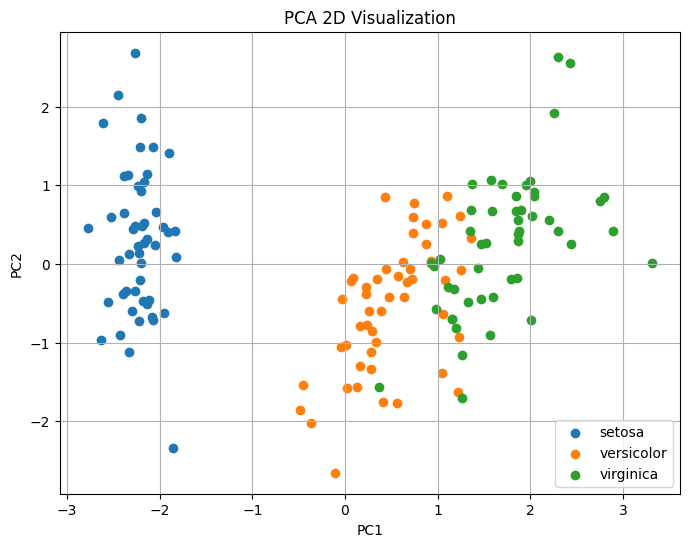

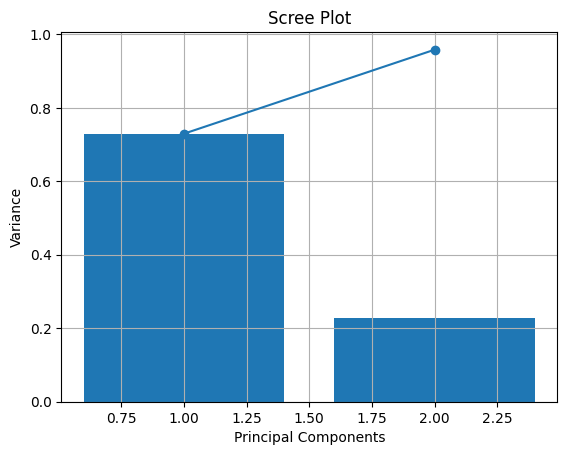

In [ ]:
X, y, feature_names, target_names = load_dataset('iris')

X_standardized, X_normalized = preprocess_data(X)

X_pca, pca, evr, cum_var = apply_pca(X_standardized, n_components=2)

plot_pca_2d(X_pca, y, target_names)
plot_scree_plot(evr, cum_var)
